<a href="https://colab.research.google.com/github/damiangohrh123/ml_projects/blob/main/classification/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 MNIST Digit Classifier (Deep Learning Project)

In this project, we'll build, train, and evaluate a simple **feedforward neural network** using **PyTorch** to classify handwritten digits from the **MNIST dataset**.

In [ ]:
# Setup & Imports
!pip install torch torchvision matplotlib --quiet

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cpu


## Step 1: Data Preparation

We'll use the official **MNIST** dataset (60,000 training + 10,000 test images) provided by `torchvision.datasets`, which downloads the data automatically from Yann LeCun’s official mirror. Each image is 28×28 pixels and represents digits 0–9.

We'll normalize pixel values to the range `[-1, 1]` for better training stability.



In [ ]:
# Transform pipeline: Convert to tensor and normalize between [-1, 1]
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load MNIST dataset from torchvision
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform) # Apply transforming pipeline
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform) # Apply transforming pipeline

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=True)

# Step 2: Visualize Sample Images
Before training, it's helpful to inspect some samples to understand what the data looks like.

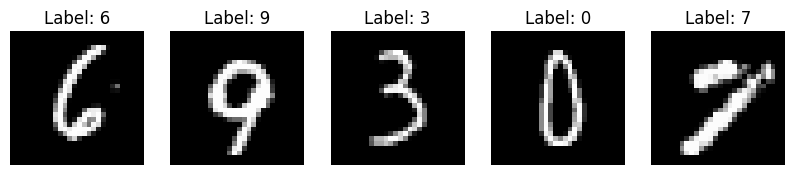

In [ ]:
# Get one batch of images and labels
images, labels = next(iter(train_loader))

# Display 5 sample images with their labels
fig, axes = plt.subplots(1, 5, figsize=(10,2))
for i in range(5):
    axes[i].imshow(images[i].squeeze(), cmap='gray')
    axes[i].set_title(f"Label: {labels[i].item()}")
    axes[i].axis('off')
plt.show()

# Step 3: Define the Neural Network

We'll define a simple feedforward neural network (MLP) with:
- Input layer: 784 nodes (28x28)
- Hidden layers: 128 → 64 nodes
- Output layer: 10 nodes (digits 0–9)
- ReLU activations between layers

In [ ]:
class MNISTClassifier(nn.Module):
    def __init__(self):
        super(MNISTClassifier, self).__init__()
        self.network = nn.Sequential(
            nn.Flatten(),          # Flatten 28x28 images to 784-dim vector
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)      # Output layer for 10 classes
        )

    def forward(self, x):
        return self.network(x)

# Instantiate model and move to device
model = MNISTClassifier().to(device)

# Step 4: Loss Function and Optimizer

We'll use CrossEntropyLoss (combines softmax + negative log likelihood) and Adam optimizer for training.

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 5: Training Loop

We'll train the network for 5 epochs, track the training loss, and print the average loss per epoch.


In [ ]:
epochs = 5
train_losses = []    # Used later for plotting learning curves

for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Zero gradients. Clear gradients from previous batch
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{epochs}] - Loss: {avg_loss:.4f}")


Epoch [1/5] - Loss: 0.3912
Epoch [2/5] - Loss: 0.1832
Epoch [3/5] - Loss: 0.1338
Epoch [4/5] - Loss: 0.1062
Epoch [5/5] - Loss: 0.0931


# Step 6: Plot Training Loss

Visualizing training loss helps us understand how the network is learning over epochs.


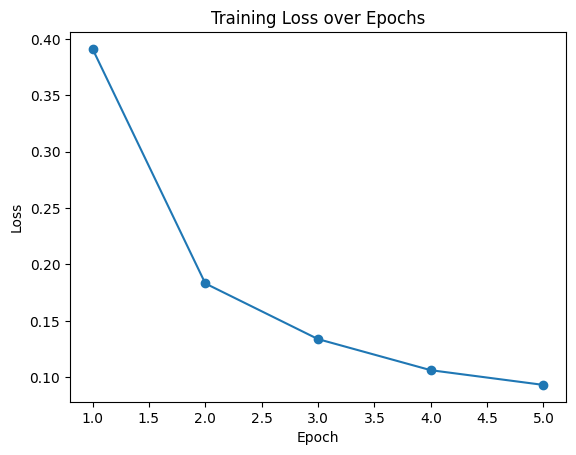

In [ ]:
plt.plot(range(1, epochs+1), train_losses, marker='o')
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


# Step 7: Evaluate Model Accuracy

We'll compute the accuracy on the test set to check how well the model generalizes.


In [ ]:
correct, total = 0, 0

# Set to evaluation mode
model.eval()
with torch.no_grad():   # Disable gradient calculations to save memory
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Test Accuracy: 97.12%


# Step 8: Visualize Predictions

Display some test images along with their predicted and true labels.


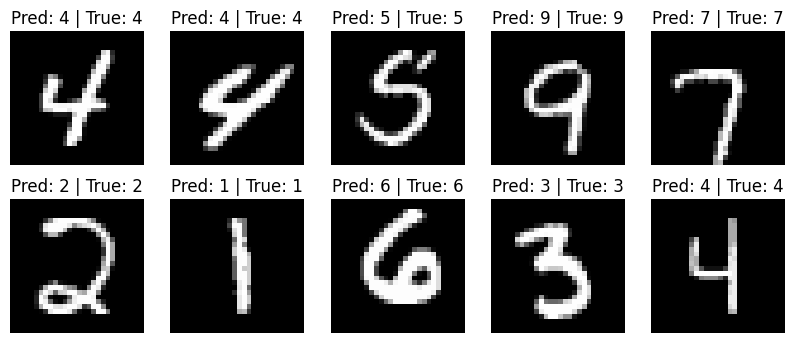

In [ ]:
def show_predictions():
    images, labels = next(iter(test_loader))
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(images[i].cpu().squeeze(), cmap='gray')
        ax.set_title(f"Pred: {preds[i].item()} | True: {labels[i].item()}")
        ax.axis('off')
    plt.show()

show_predictions()


# Step 9: Save the Model

Save the trained model for future use or deployment.


In [ ]:
torch.save(model.state_dict(), "mnist_classifier.pth")


# Project Summary

**Dataset:** MNIST (60k train, 10k test)  
**Model:** 3-layer feedforward neural network (MLP) with ReLU activations  
**Loss Function:** CrossEntropyLoss  
**Optimizer:** Adam  
**Epochs:** 5  
**Results:** ~97–98% test accuracy  

**Key Learnings:**
- Implemented a neural network in PyTorch
- Trained and evaluated a model with a full training loop
- Visualized training loss and predictions
- Prepared a portfolio-ready project

**Future Improvements:**
- Experiment with dropout, batch normalization, or CNNs
- Deploy the model using Streamlit or Gradio
